In [35]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/abhijitpaul0212/DataSets/main/StudentsPerformance.csv")
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
533,female,group E,associate's degree,standard,completed,79,88,94
235,male,group D,associate's degree,standard,none,80,75,77
478,female,group D,master's degree,standard,none,55,64,70
690,female,group C,associate's degree,standard,none,49,53,53
743,female,group C,associate's degree,standard,completed,59,73,72


### Checks to perform

* Check for missing values
* Check for duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [37]:
# check missing value

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in any of the columns

In [38]:
# check for duplicates
df.duplicated().sum()

0

There are no duplicate values in any of the columns

In [39]:
# check for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


* There are 1000 records and 8 features
* `gender`, `race/ethnicity`, `parental education`, `lunch`, `test prep course` are categorical features
* `math score`, `reading score` and `writing score` are numerical features

In [40]:
# check for unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [41]:
# check for descriptive statistics

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* From the above description of numerical data, all means are very close to each other - between 66 and 68
* All standard deviations are also close - between 14.60 to 15.19
* While there is a minimum score of 0 for math, for writing minimum is much higher = 10 followed by reading with 17.

In [42]:
# Define Numerical & Categorical features

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [43]:
# List of unique values in categorical features

for feature in categorical_features:
    print("{0} feature has {1} unique values: {2}\n".format(feature.capitalize(), df[feature].nunique(), df[feature].unique()))

Gender feature has 2 unique values: ['female' 'male']

Race/ethnicity feature has 5 unique values: ['group B' 'group C' 'group A' 'group D' 'group E']

Parental level of education feature has 6 unique values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Lunch feature has 2 unique values: ['standard' 'free/reduced']

Test preparation course feature has 2 unique values: ['none' 'completed']



### Creating new features "Total Score" and "Average Score"

In [48]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = round(df['total score'] / 3, 2)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [54]:
# Getting number of students getting 100% marks in each subject

reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print("Number of students with full marks in Maths: {}".format(math_full))
print("Number of students with full marks in Writing: {}".format(writing_full))
print("Number of students with full marks in Reading: {}".format(reading_full))


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [57]:
# Getting number of students getting less than 20% marks in each subject

reading_less_20 = df[df['reading score'] < 20]['average score'].count()
writing_less_20 = df[df['writing score'] < 20]['average score'].count()
math_less_20 = df[df['math score'] < 20]['average score'].count()

print("Number of students with less than 20 marks in Maths: {}".format(math_less_20))
print("Number of students with less than 20 marks in Writing: {}".format(writing_less_20))
print("Number of students with less than 20 marks in Reading: {}".format(reading_less_20))

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
* From above observation, we can see students performed worst in Maths
* Best performance is observed in Reading section

### On basis on gender, who performed well?

In [63]:
df['gender'] == 'male'

gender
False    518
True     482
Name: average score, dtype: int64

* Barplot
* Histogram
* Kernel Density Function (KDE)

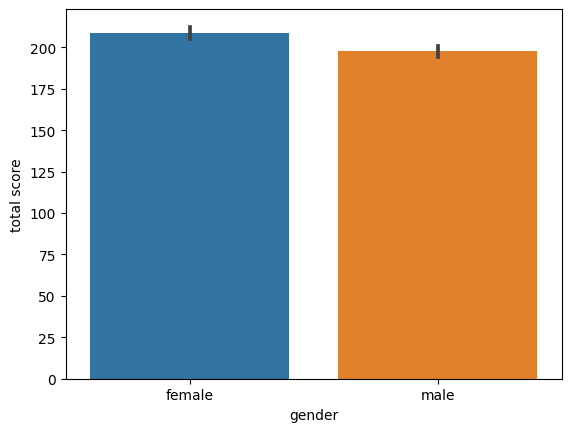

In [73]:
# Visualise total score on the basis of student gender

sns.barplot(data=df, x='gender', y='total score')
plt.show()

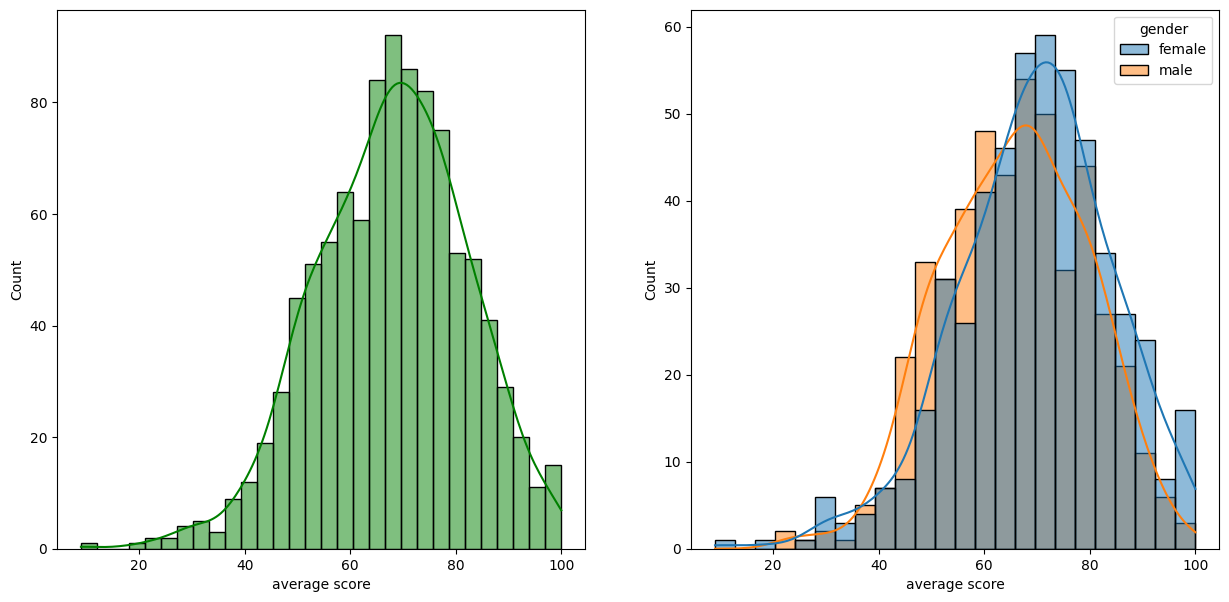

In [79]:
# Visualise average score of students on the basis of gender

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='average score', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True, hue='gender')
plt.show()

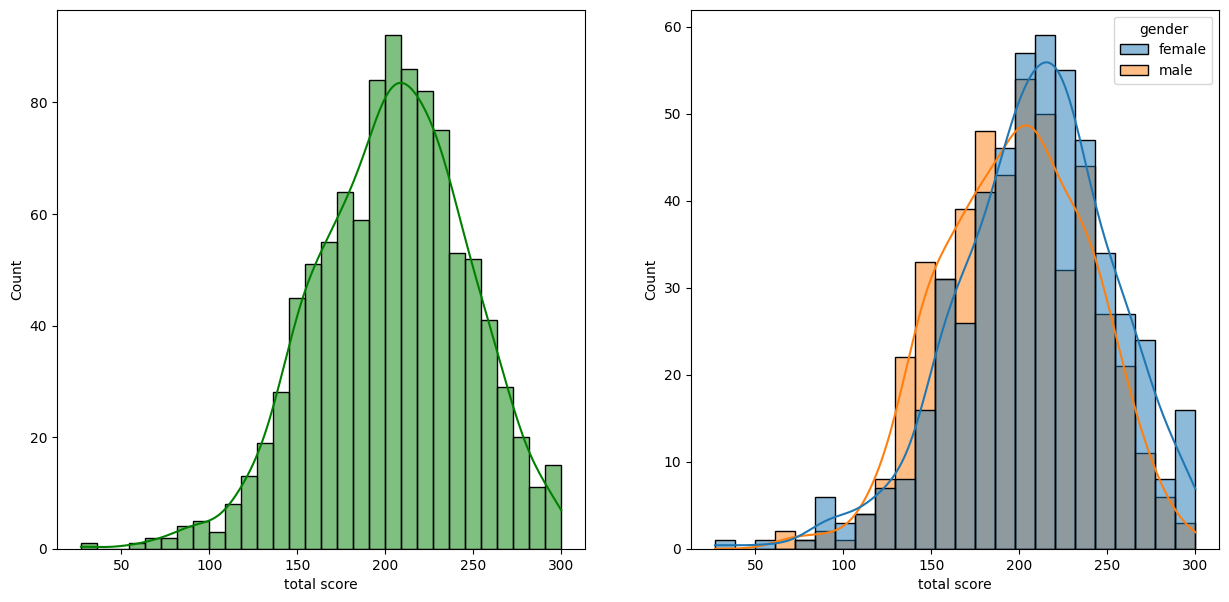

In [80]:
# Visualise total score of students on the basis of gender

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

### Insights

* Female students tend to perform well than male students

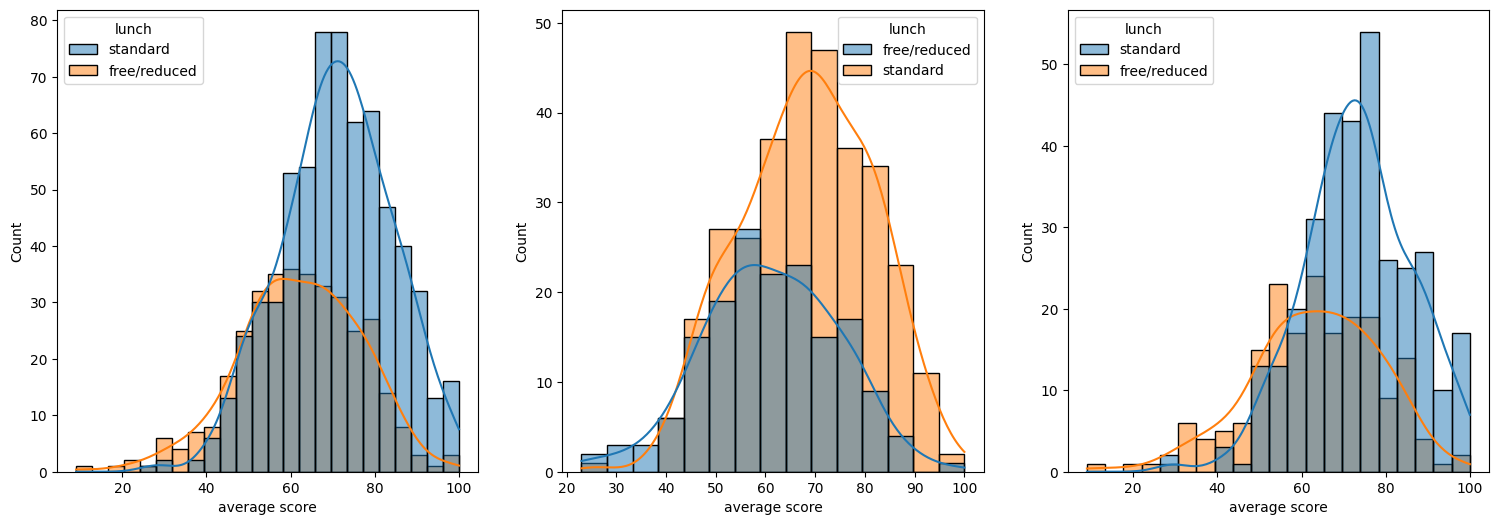

In [87]:
# Visualise average score of students on the basis of gender and lunch

fig, ax = plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, hue='lunch')

plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average score', kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'], x='average score', kde=True, hue='lunch')

plt.show()

### Insights

* Standard lunch helps perform well in exam
* Standard lunch helps perform well in exams be it male or female


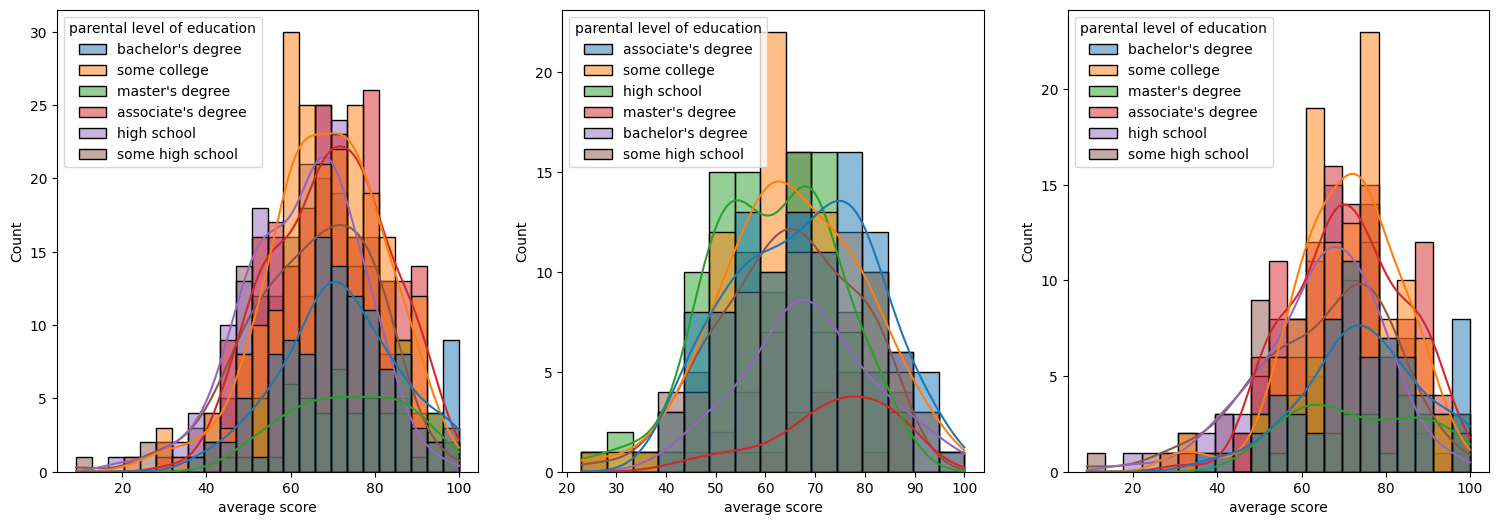

In [88]:
# Visualise average score of students on the basis of gender and parental level of education

fig, ax = plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, hue='parental level of education')

plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average score', kde=True, hue='parental level of education')

plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'], x='average score', kde=True, hue='parental level of education')

plt.show()

### Insights

* In general, parents level of education don't help students to perform well in exam
* In 2nd plot, parent's whose education is of 'masters degree' or 'associate degree', their male child tend to perform well in exam
* In 3rd plot, we can see there is no effect of parent's level of education on female students

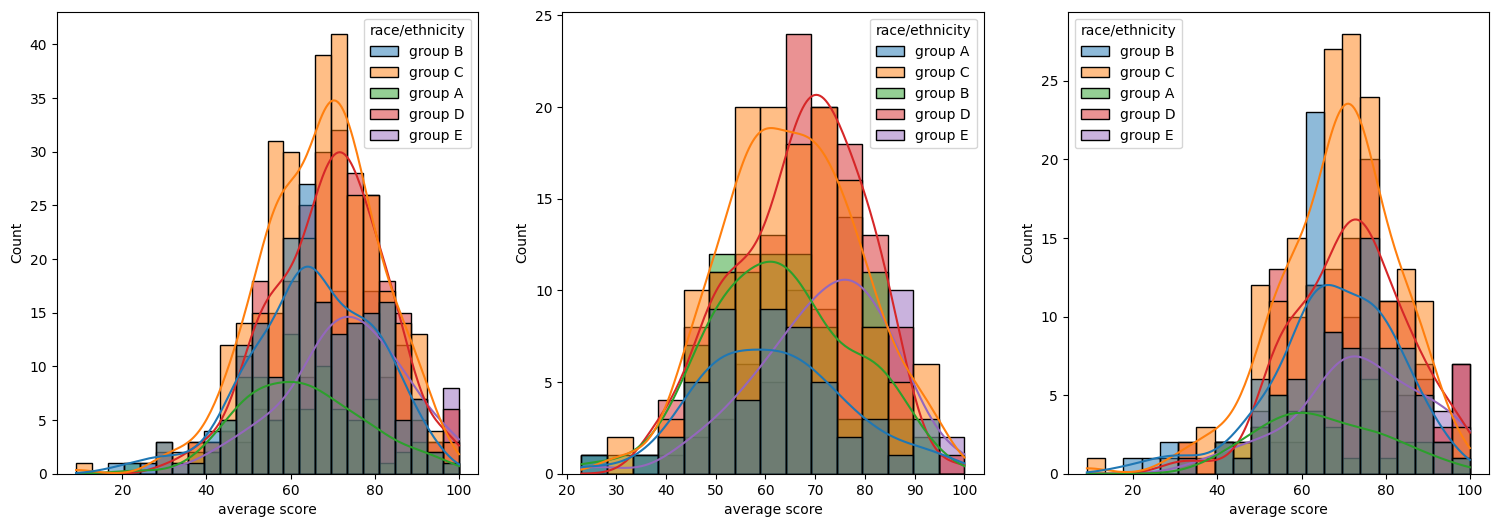

In [89]:
# Visualise average score of students on the basis of gender and race/ethnicity

fig, ax = plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, hue='race/ethnicity')

plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average score', kde=True, hue='race/ethnicity')

plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'], x='average score', kde=True, hue='race/ethnicity')

plt.show()



### Insights

* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of male or female

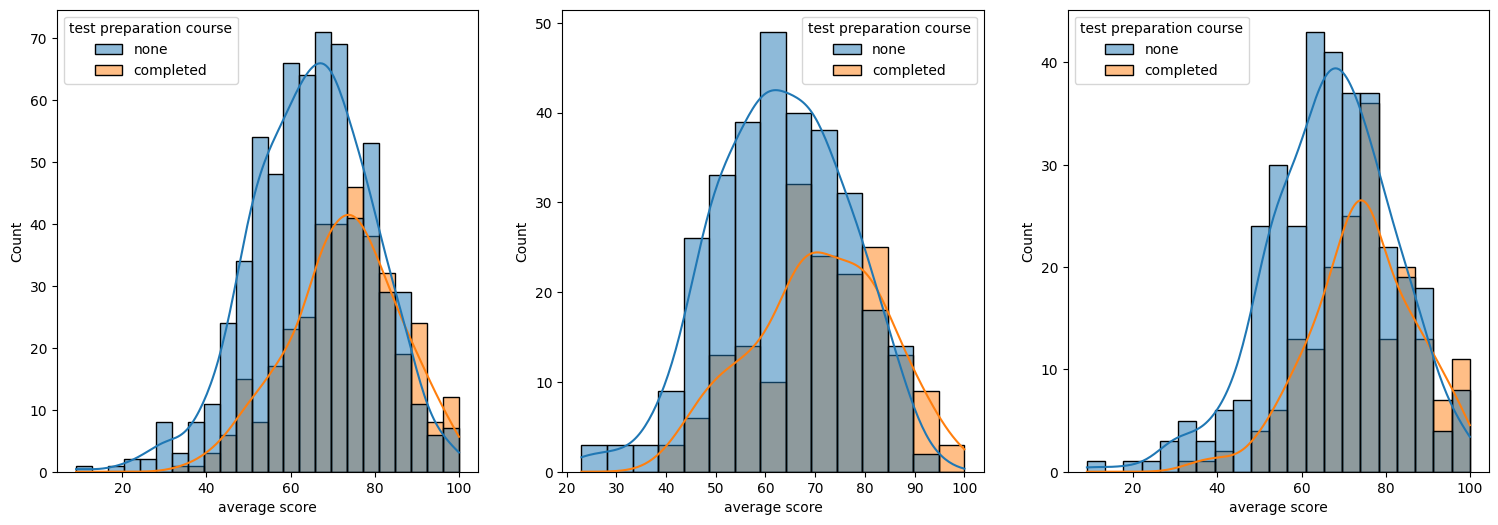

In [90]:
# Visualise average score of students on the basis of gender and test preparation course

fig, ax = plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, hue='test preparation course')

plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average score', kde=True, hue='test preparation course')

plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'], x='average score', kde=True, hue='test preparation course')

plt.show()

### Insights

* Students of who completed their test preparation course performed well.
* Students of who completed their test preparation course performed well irrespective of male or female

### Maximumum score of students in all three subjects

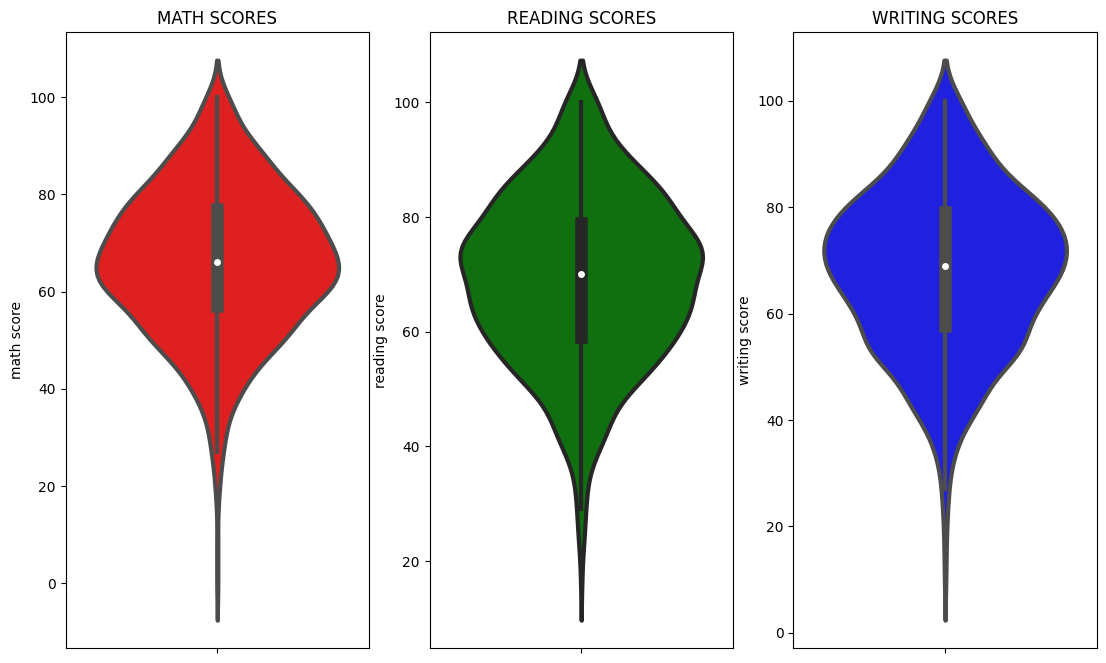

In [92]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)

plt.show()

### Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Multivariate analysis using pieplot

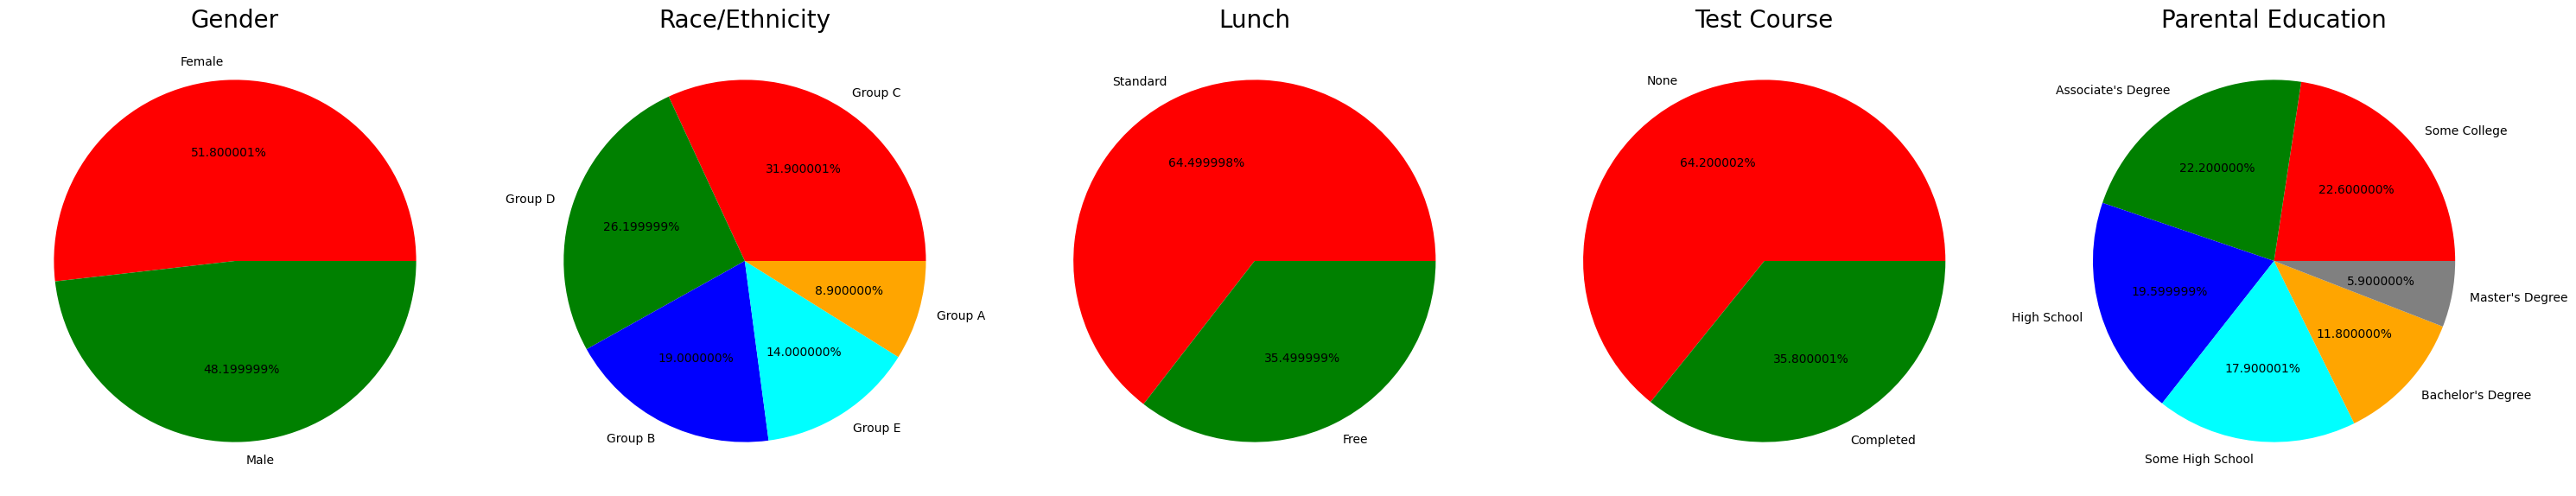

In [96]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Feature Wise Visualization
### GENDER COLUMN
* How is the distribution of Gender ?
* Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

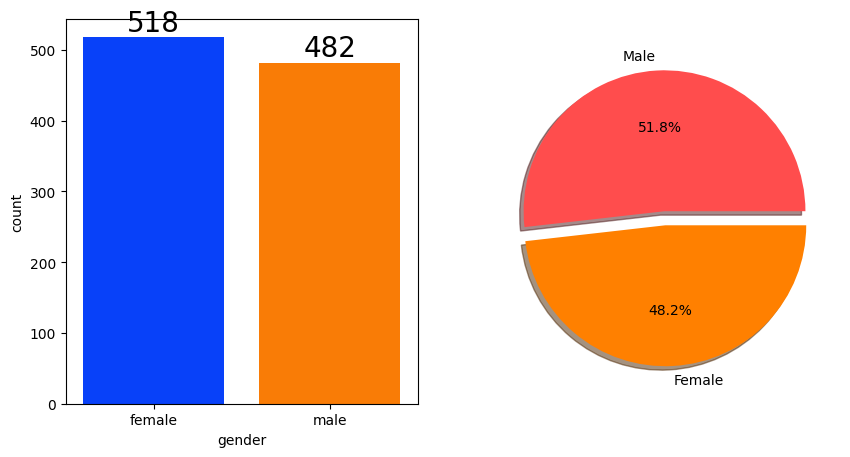

In [103]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [104]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


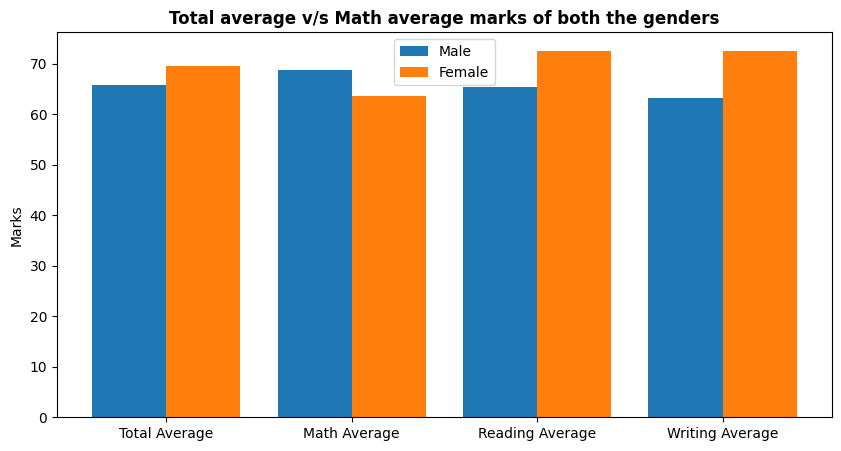

In [107]:
plt.figure(figsize=(10, 5))

X = ['Total Average','Math Average', 'Reading Average', 'Writing Average']


female_scores = [gender_group['average score'][0], gender_group['math score'][0], gender_group['reading score'][0], gender_group['writing score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1], gender_group['reading score'][1], gender_group['writing score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
* On an average females have a better overall score than men.
* Whereas males have scored higher in Maths.
* Females have outperformed males in Reading & Writing skills

#### RACE/EHNICITY COLUMN
* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?
* UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

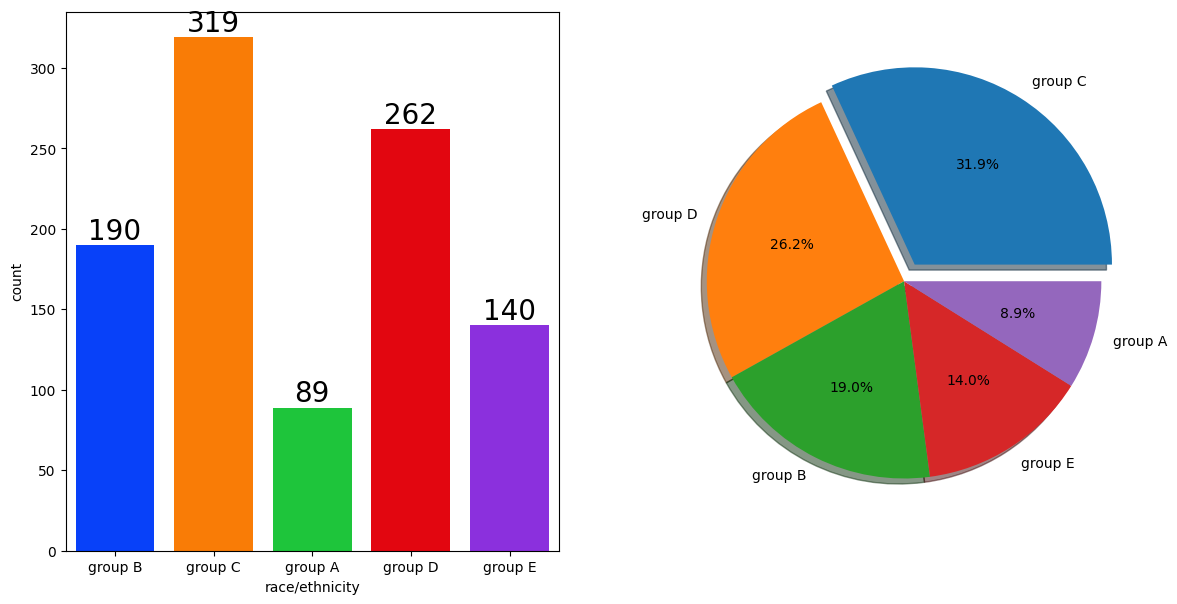

In [111]:
f,ax=plt.subplots(1,2,figsize=(14,7))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.


#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

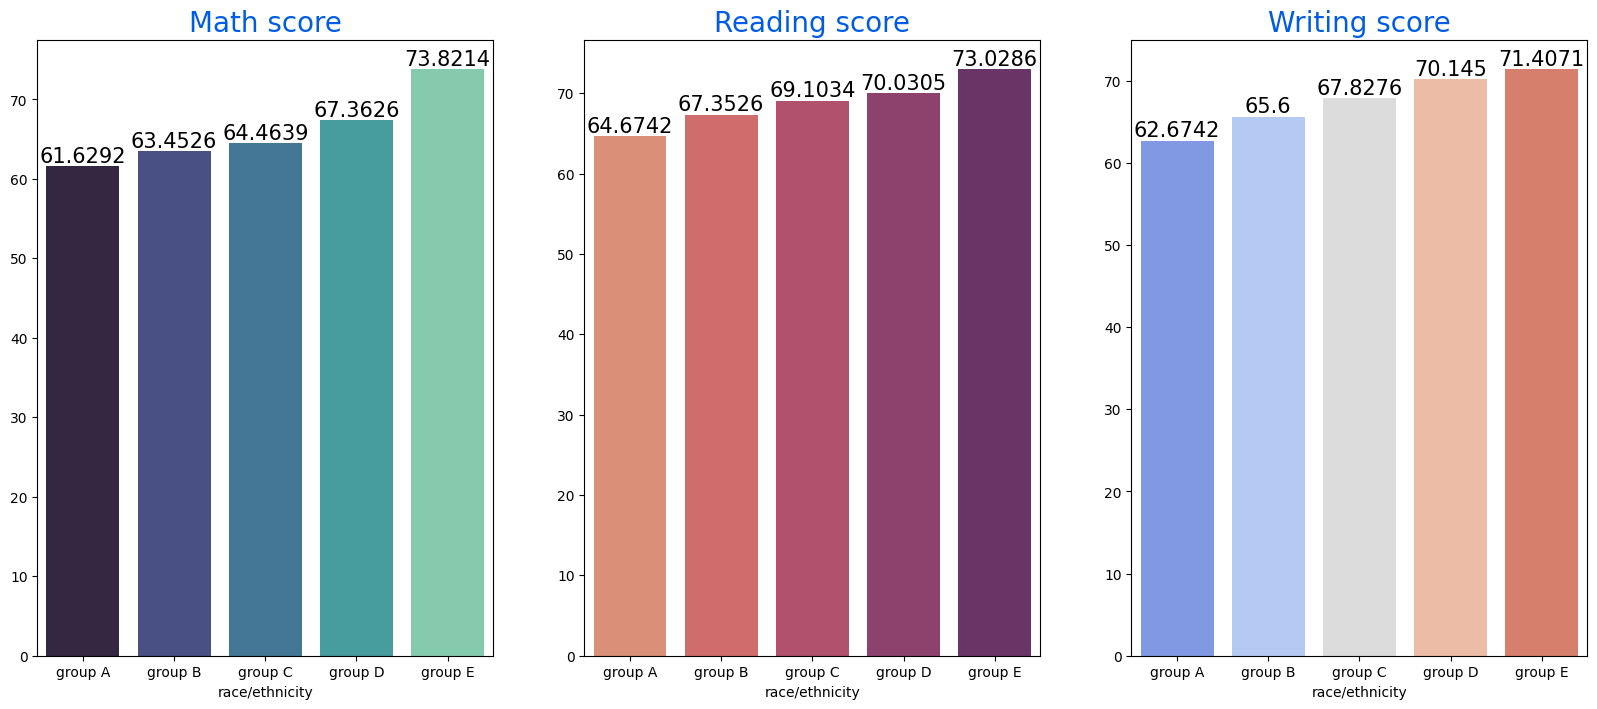

In [112]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

#### PARENTAL LEVEL OF EDUCATION COLUMN
* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?
* UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

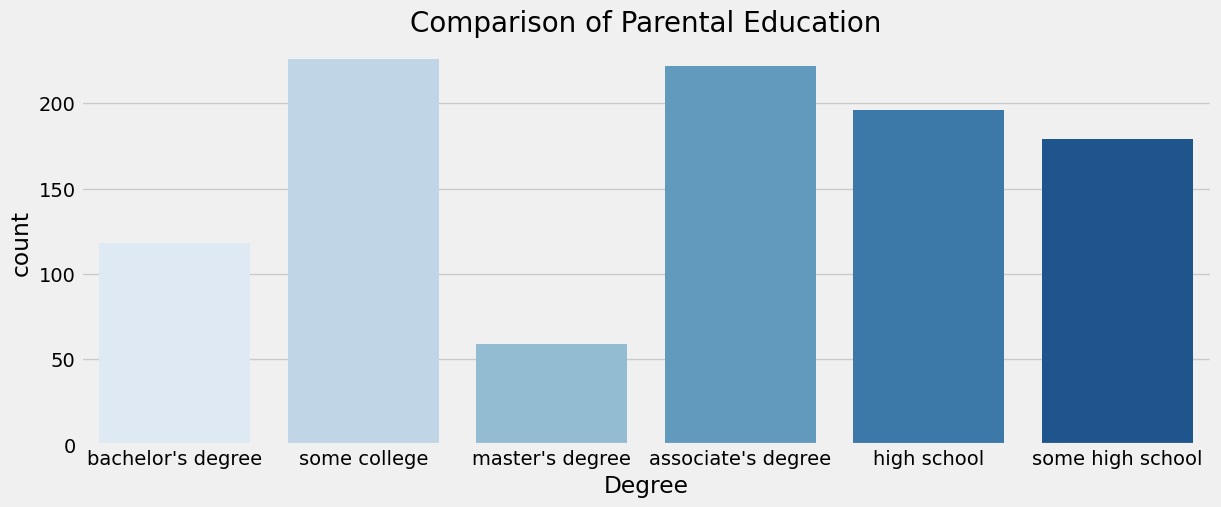

In [117]:
plt.rcParams['figure.figsize'] = (13, 5)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights
* Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

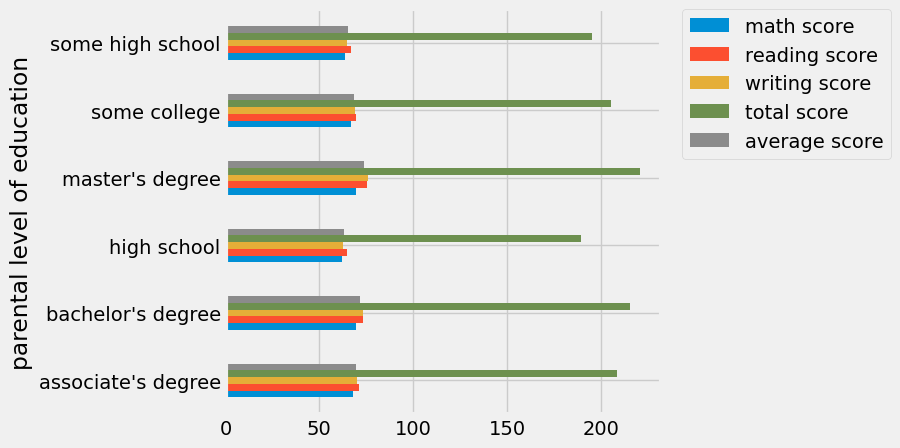

In [121]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
* The score of student whose parents possess master and bachelor level education are higher than others.

#### LUNCH COLUMN
* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?
* UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

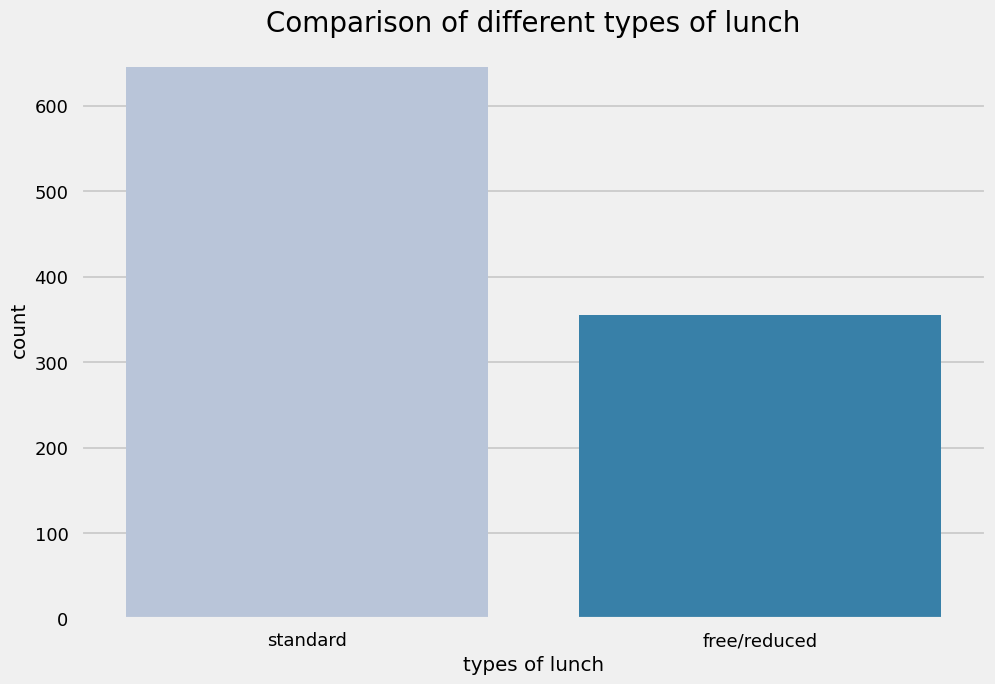

In [124]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights
* Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

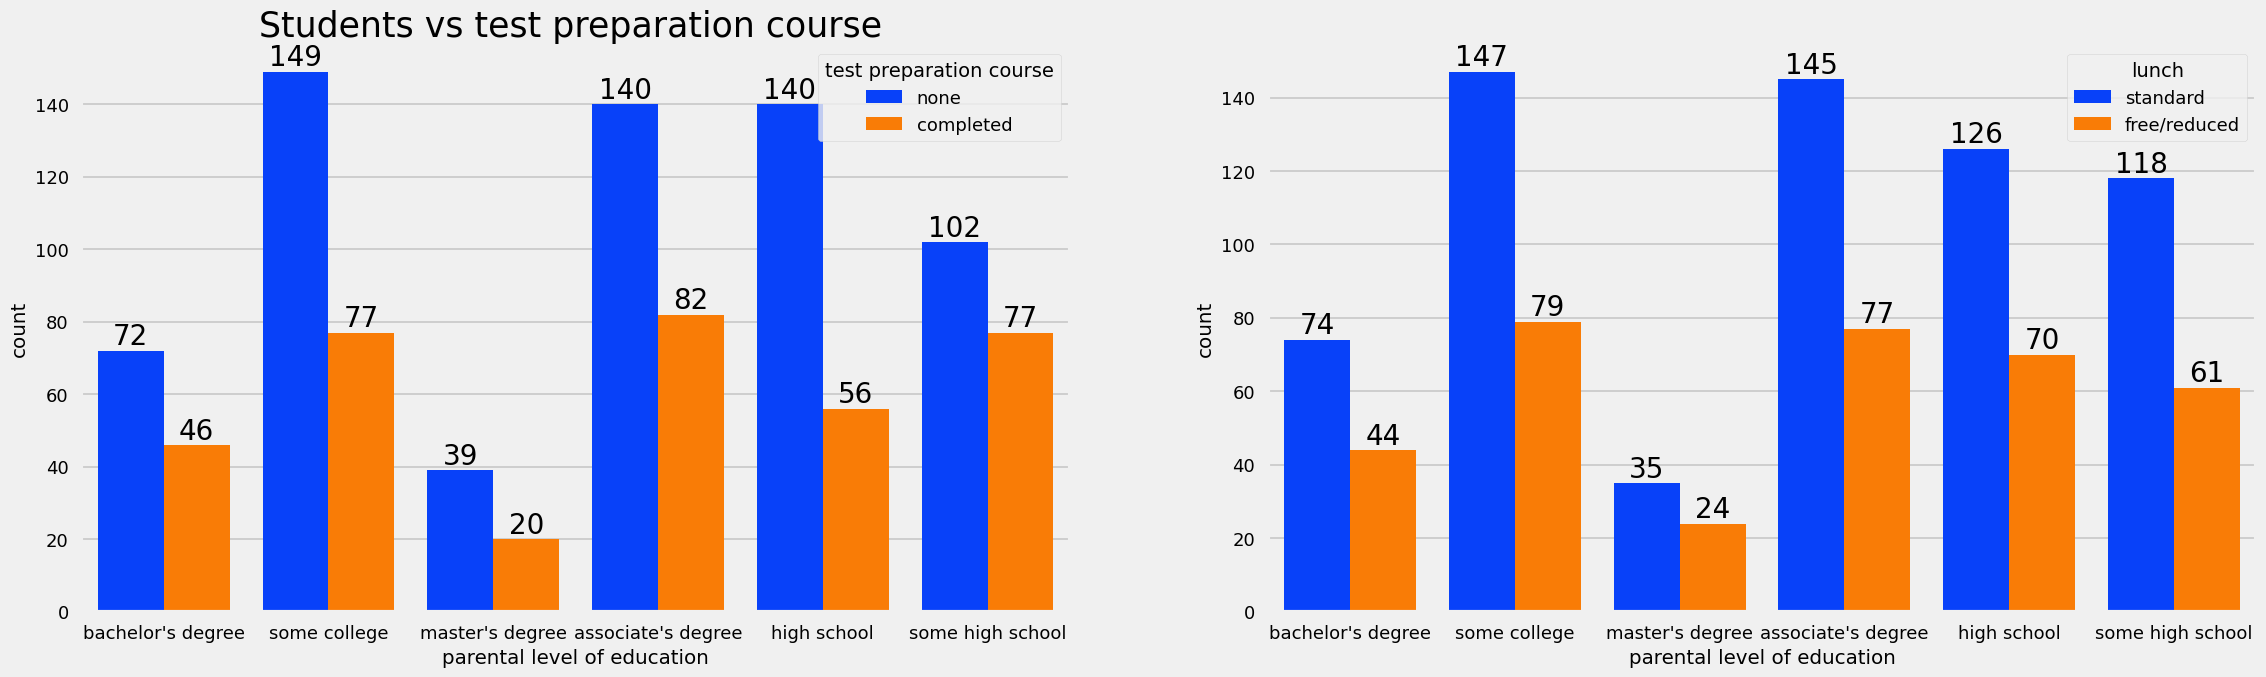

In [129]:
f,ax=plt.subplots(1,2,figsize=(25,7))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

#### Insights
Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### TEST PREPARATION COURSE COLUMN
* Which type of lunch is most common amoung students ?
* Is Test prepration course has any impact on student's performance ?
* BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

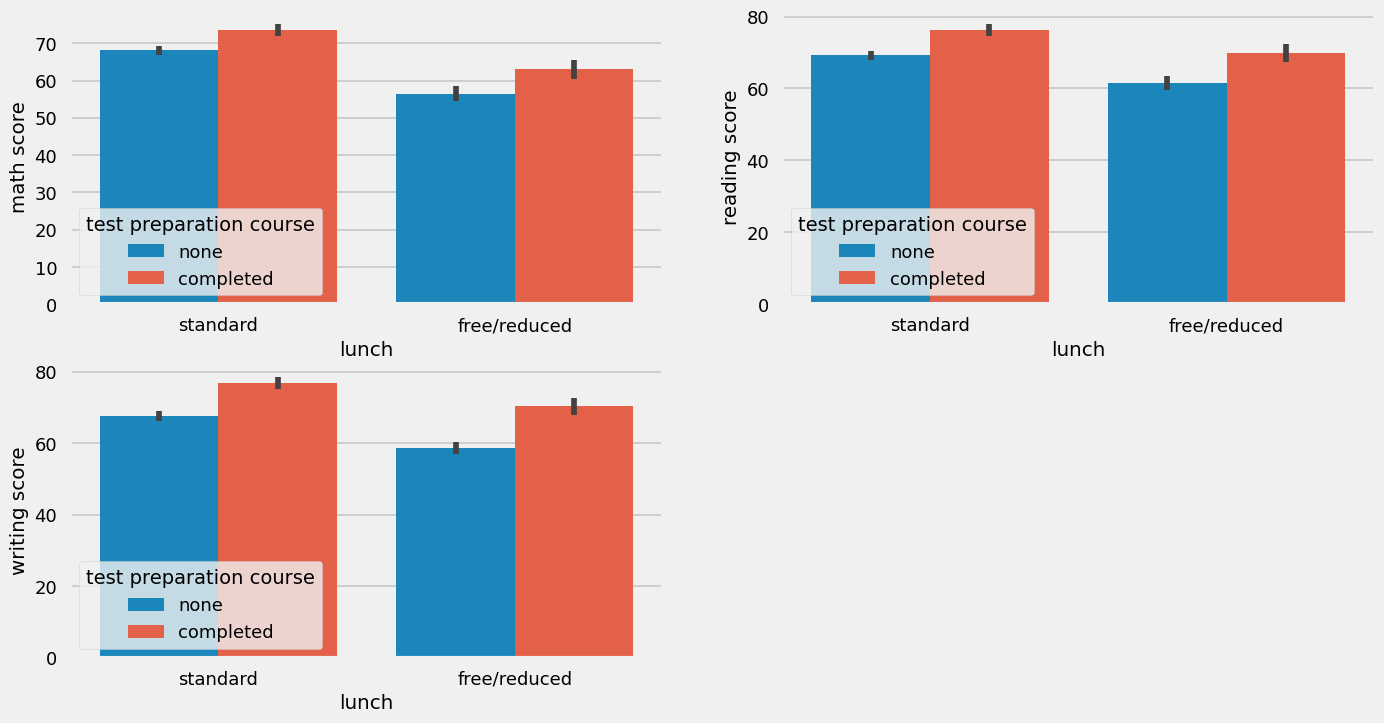

In [132]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### CHECKING OUTLIERS

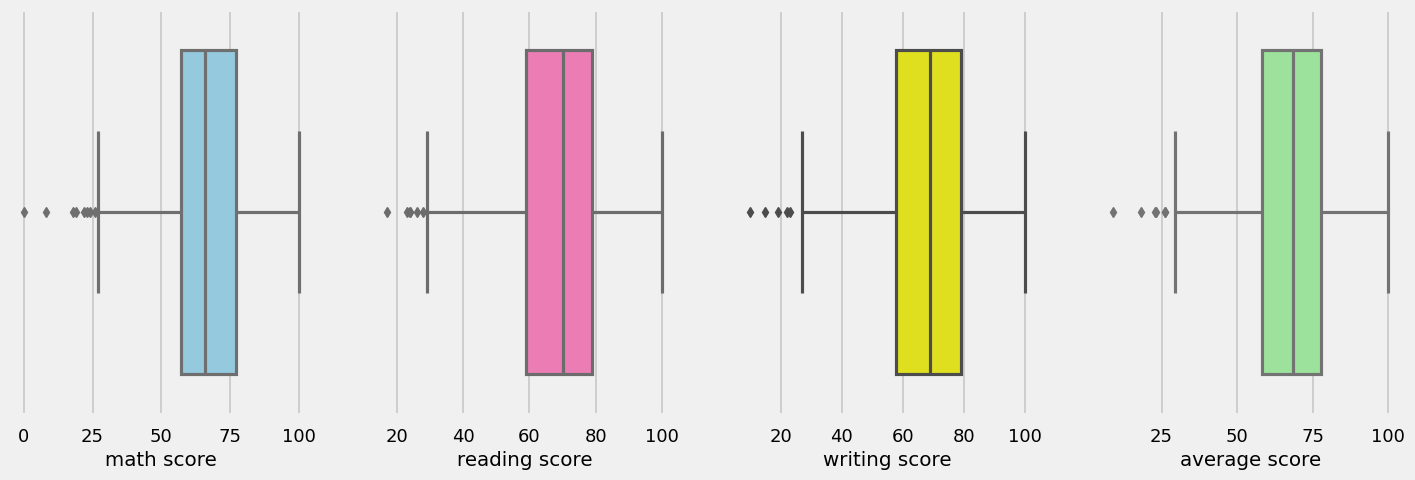

In [133]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

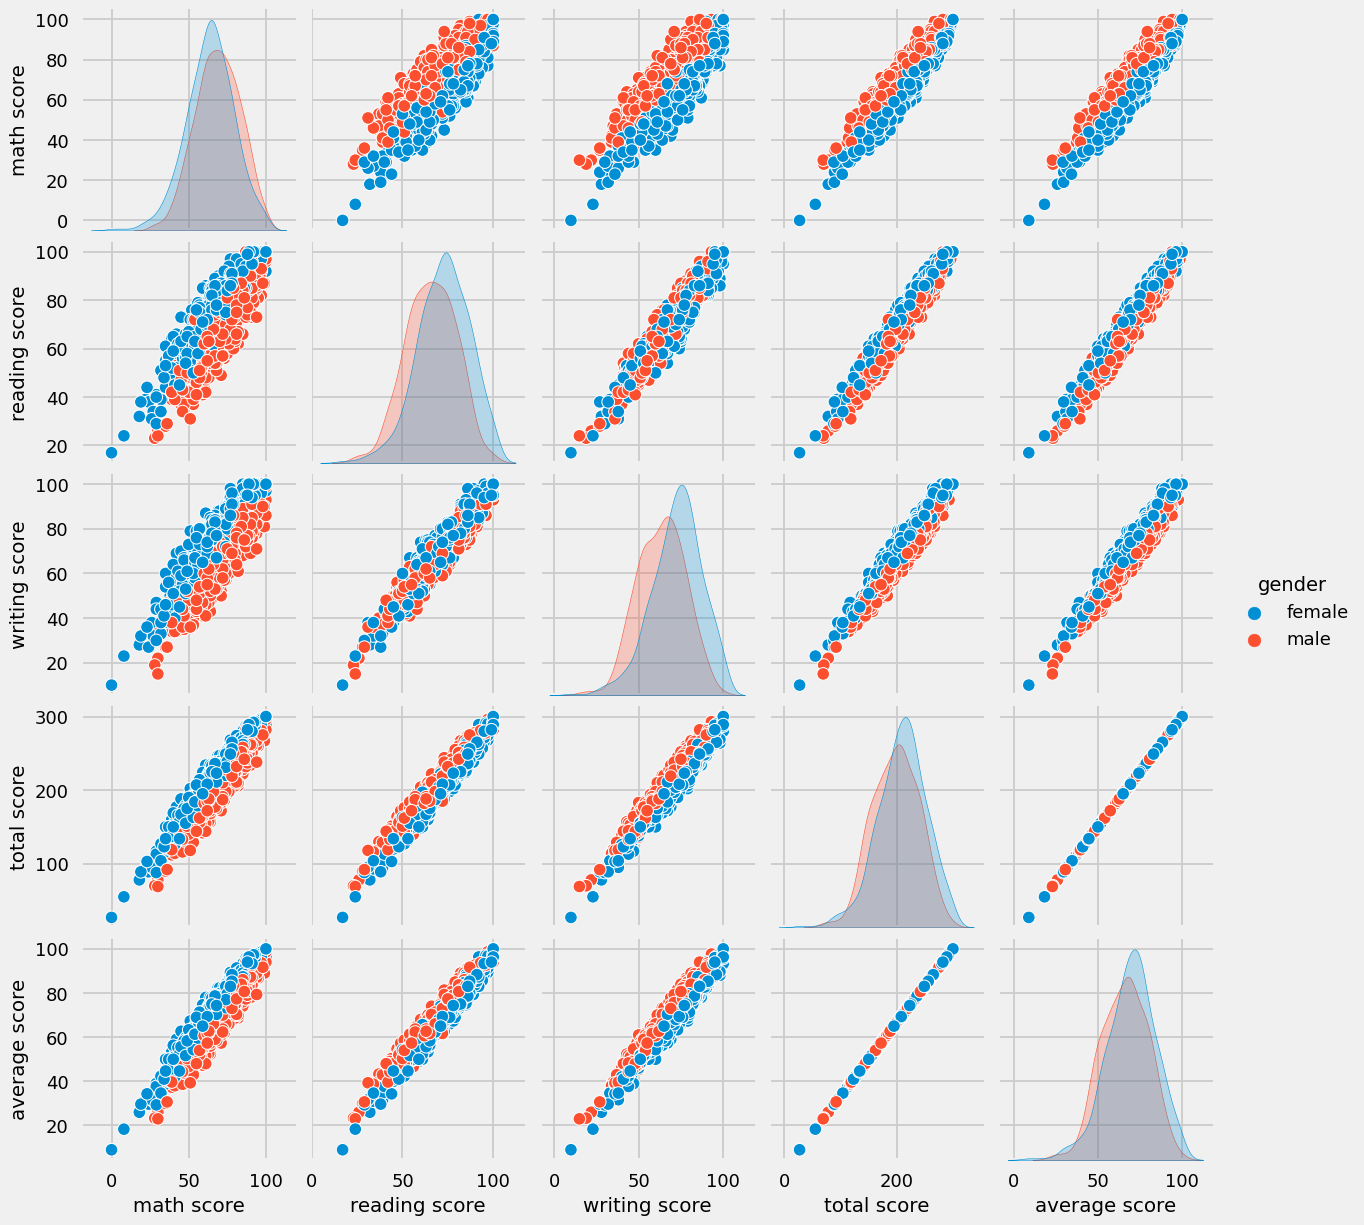

In [134]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
* From the above plot it is clear that all the scores increase linearly with each other.

### Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.